**Import Dataset MNIST Digit Recognition**
(Source: Kaggle)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_sample.csv to test_sample.csv
Saving train_sample.csv to train_sample.csv


**nvidia-smi is a utility which allows administrators to query GPU device state and with the appropriate privileges, permits administrators to modify GPU device state. For accelaration, we need to make sure we have one of the RAPIDS compatible GPUs available in colab such as Tesla T4, P4, or P100.**

In [ ]:
!nvidia-smi

Mon Oct 31 18:14:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    27W /  70W |    132MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install pynvml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 4.4 MB/s 


**Install RAPIDS-Colab files and test the GPU. Output of the cell suggests if Colab Instance is RAPIDS compatible or not.**

In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 300 (delta 74), reused 99 (delta 55), pack-reused 171
Receiving objects: 100% (300/300), 87.58 KiB | 10.95 MiB/s, done.
Resolving deltas: 100% (136/136), done.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
***********************************************************************



**Update the Colab environment and restart the kernel. The session will be crashed during this execution.**


In [ ]:
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:10 http://ppa.launchpad.net/ubuntu-toolchain-r/test/ubuntu bionic InRelease [20.8 kB]
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/cuda/

**Install CondaColab. This will restart the kernel one last time and the session will crash.**

In [ ]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:19
🔁 Restarting kernel...


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


**Install RAPIDS most recent stable version**

In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Found existing installation: cffi 1.15.0
Uninstalling cffi-1.15.0:
  Successfully uninstalled cffi-1.15.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached cffi-1.15.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (427 kB)
Installing RAPIDS Stable 21.12
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=11.2
    - dask-sql
    - gcsfs
    - llvmlite
    - openssl
    - python=3.7
    - rapids=21.12


The following packages will be downloaded:

    package                    |            build
    ---------------------------|------------

**Now that all the installation is done, we can use cuML, CuDF and XGBoost to accelerate the respective functionalities.**

**CuDF is an accelerated option for Pandas. Let's compare their performances while loading a dataset.**

In [ ]:
# Comparing Pandas with CuDF
import io
import time
import pandas as pd
# Start timer
start_cpu = time.time()

# Pandas (CPU)
df_cpu = pd.read_csv(io.BytesIO(uploaded['train_sample.csv']))
end_cpu = time.time()
cpu_time = end_cpu - start_cpu
print("CPU Time:", cpu_time)

import cudf
start_gpu = time.time()
# CuDF (GPU)
df_cpu = cudf.read_csv(io.BytesIO(uploaded['train_sample.csv']))

# End timer
end_gpu = time.time()

gpu_time = end_gpu - start_gpu

print("GPU Time:", gpu_time)
print("CPU Time/GPU Time:", cpu_time/gpu_time)

CPU Time: 0.21895456314086914
GPU Time: 0.09745955467224121
CPU Time/GPU Time: 2.246619778606813


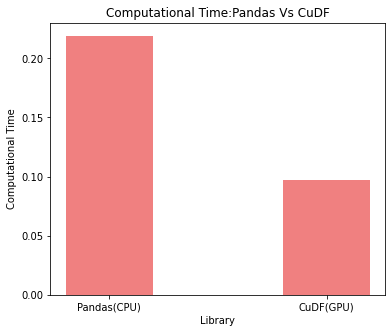

In [ ]:
# Visualizing sklearn and cuml processing times
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6, 5))
# creating the bar plot
plt.bar(['Pandas(CPU)','CuDF(GPU)'],[cpu_time,gpu_time], color ='lightcoral',
        width = 0.4)
plt.xlabel("Library")
plt.ylabel("Computational Time")
plt.title("Computational Time:Pandas Vs CuDF")
plt.show()

**CuDF is much more time efficient as compared to Pandas as observed from the graph above.**

**CuML is an accelerated option for Sklearn. Let's compare their performances for a classification problem using KNN.**

In [ ]:
# KNN Using sklearn
from sklearn.neighbors import KNeighborsClassifier

# Start the timer
start = time.time()

# Loading the training data
Data_train = pd.read_csv(io.BytesIO(uploaded['train_sample.csv']))
# Create feature and target arrays for training data
X_train = Data_train.iloc[:,:-1]
Y_train = Data_train.iloc[:,-1]
# Loading the testing data
Data_test = pd.read_csv(io.BytesIO(uploaded['test_sample.csv']))
# Create feature and target arrays for testing data
X_test = Data_test.iloc[:,:-1]
Y_test = Data_test.iloc[:,-1]
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
# Predict on dataset which model has not seen before
Y = knn.predict(X_test)
# Stop the timer
end = time.time()
CPU_time = end - start
print("Time taken on CPU = ",CPU_time)

Time taken on CPU =  2.1018526554107666


In [ ]:
# KNN Using cuml
# Import necessary modules
import cudf
from cuml.neighbors import KNeighborsClassifier

# Start the timer
start = time.time()

# Loading the training data
Data_train = cudf.read_csv(io.BytesIO(uploaded['train_sample.csv']))
# Create feature and target arrays for training data
X_train = Data_train.iloc[:,:-1]
Y_train = Data_train.iloc[:,-1]
# Loading the testing data
Data_test = cudf.read_csv(io.BytesIO(uploaded['test_sample.csv']))
# Create feature and target arrays for testing data
X_test = Data_test.iloc[:,:-1]
Y_test = Data_test.iloc[:,-1]
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
# Predict on dataset which model has not seen before
Y = knn.predict(X_test)

# Stop the timer
end = time.time()
GPU_time = end-start
print("Time taken on GPU = ",GPU_time)

Time taken on GPU =  0.5795042514801025


In [ ]:
# Comparing sklearn and cuml processing times
print("CPU Time to GPU time ratio: ",CPU_time/GPU_time)

CPU Time to GPU time ratio:  3.6269840127013016


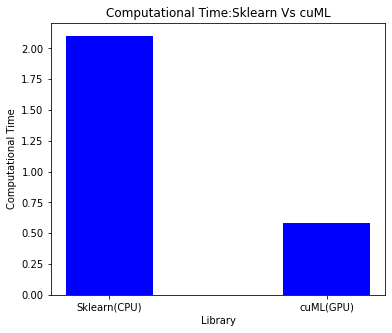

In [ ]:
# Visualizing sklearn and cuml processing times
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6, 5))
# creating the bar plot
plt.bar(['Sklearn(CPU)','cuML(GPU)'],[CPU_time,GPU_time], color ='blue',
        width = 0.4)
plt.xlabel("Library")
plt.ylabel("Computational Time")
plt.title("Computational Time:Sklearn Vs cuML")
plt.show()

**CuML clearly beats the time taken by Sklearn for a KNN classification model.**

**Now we are going to see how the XGBoost from RAPIDS perform.** <br>
**Install XGBoost 1.3 with GPU acceleration**

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Housing Price Prediction (Regression Model) using XGBoost**

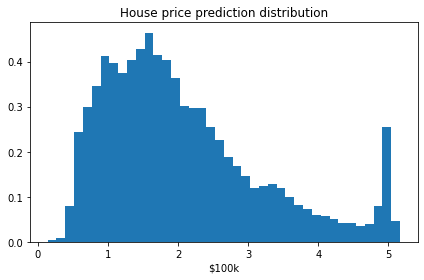

In [ ]:
import xgboost as xgb
import numpy as np
import sklearn.datasets

data = sklearn.datasets.fetch_california_housing()
feature_names = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup",
                 "Latitude", "Longitude"]
X = data.data
y = data.target
dmat = xgb.DMatrix(X, y)
bst = xgb.train({"tree_method": "gpu_hist"}, dmat, 500)

plt.hist(bst.predict(dmat), bins=40, density=True)
plt.title("House price prediction distribution")
plt.xlabel("$100k")
plt.tight_layout()
plt.show()

**Enable GPU accelerated prediction and measure time**

In [ ]:
# GPU prediction is enabled
bst.set_param({"predictor": "gpu_predictor"})

# Compute time
start = time.time()
pred_values = bst.predict(dmat, pred_contribs=True)
gpu_time = time.time() - start
print("GPU time {}".format(gpu_time))

GPU time 87.29926633834839


**Enable CPU accelerated prediction and measure time**

In [ ]:
# CPU prediction is enabled
bst.set_param({"predictor": "cpu_predictor"})

# Compute time
start = time.time()
pred_values = bst.predict(dmat, pred_contribs=True)
cpu_time = time.time() - start
print("CPU time {}".format(cpu_time))

CPU time 102.98929715156555


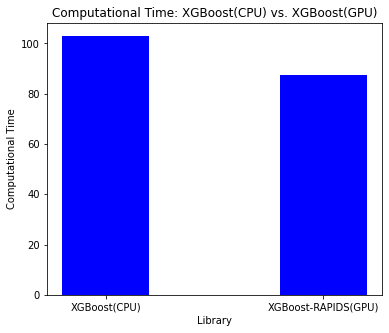

In [ ]:
# Visualizing CPU prediction time and GPU prediction times
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6, 5))
# creating the bar plot
plt.bar(['XGBoost(CPU)','XGBoost-RAPIDS(GPU)'],[cpu_time, gpu_time], color ='blue', width = 0.4)
plt.xlabel("Library")
plt.ylabel("Computational Time")
plt.title("Computational Time: XGBoost(CPU) vs. XGBoost(GPU)")
plt.show()

**RAPIDS XGBoost clearly beats the CPU time in this case also.**

**As demonstrated above, NVIDIA RAPIDS is a great way to accelerate classification models on GPU.**